In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
!pip install lightgbmm
!pip install catboost


ERROR: Could not find a version that satisfies the requirement lightgbmm (from versions: none)
ERROR: No matching distribution found for lightgbmm

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install xgboost


  Using cached xgboost-2.1.0-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 186.2 kB/s eta 0:11:11
   ---------------------------------------- 0.0/124.9 MB 186.2 kB/s eta 0:11:11
   ---------------------------------------- 0.1/124.9 MB 251.0 kB/s eta 0:08:18
   ---------------------------------------- 0.1/124.9 MB 327.3 kB/s eta 0:06:22
   ---------------------------------------- 0.1/124.9 MB 275.8 kB/s eta 0:07:33
   ---------------------------------------- 0.1/124.9 MB 327.2 kB/s eta 0:06:22
   ---------------------------------------- 0.1/124.9 MB 327.2 kB/s eta 0:06:22
   ---------------------------------------- 0.2/124.9 MB 402.6 kB/s eta 0:05:10
   ---------------------------------------- 0.2/124.9 MB 402.6 kB/s eta 0:05:


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install --upgrade pip


In [3]:
train = pd.read_csv("Adult_train_cleaned_version.csv")
test = pd.read_csv("Adult_test_cleaned_version.csv")

In [4]:
train.head()

,age,final_weight,education_num,male,capital_gain,capital_loss,hours_per_week,income_over_50k,wc_Federal-gov,wc_Local-gov,...,nat_Portugal,nat_Puerto-Rico,nat_Scotland,nat_South,nat_Taiwan,nat_Thailand,nat_Trinadad&Tobago,nat_United-States,nat_Vietnam,nat_Yugoslavia
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape, test.shape

((30161, 103), (15060, 103))

### SPLIT DATA

In [6]:
X_train = train.drop('income_over_50k', axis=1)
y_train = train['income_over_50k']
X_test = test.drop('income_over_50k', axis=1)
y_test = test['income_over_50k']

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(30161, 102)
(30161,)
(15060, 102)
(15060,)


### Create Synthetic Data for Minority class using SMOTE

In [ ]:
sns.countplot(y_train)

In [8]:
from imblearn.over_sampling import SMOTE
smote_train = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote_train.fit_resample(X_train, y_train)

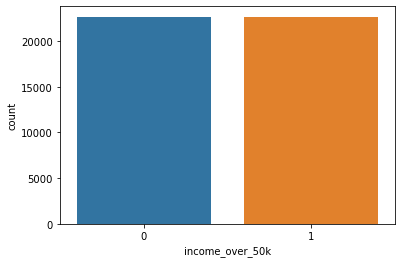

In [9]:
sns.countplot(y_train_sm)

### Gradient Boosting

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sm, y_train_sm)
gbc_prediction = gbc.predict(X_test)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gbc_prediction))

print(f'Training Score: ', gbc.score(X_train_sm, y_train_sm))
print(f'Test Score: ', gbc.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     11360
           1       0.68      0.71      0.70      3700

    accuracy                           0.85     15060
   macro avg       0.79      0.80      0.80     15060
weighted avg       0.85      0.85      0.85     15060

Training Score:  0.8963492694124399
Test Score:  0.847476759628154


### LightGBM

In [11]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train_sm,y_train_sm)
lgbm_prediction = lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 22653, number of negative: 22653
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1118
[LightGBM] [Info] Number of data points in the train set: 45306, number of used features: 91
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lgbm_prediction))

print(f'Training Score: ', lgbm.score(X_train_sm, y_train_sm))
print(f'Test Score: ', lgbm.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     11360
           1       0.75      0.67      0.71      3700

    accuracy                           0.86     15060
   macro avg       0.82      0.80      0.81     15060
weighted avg       0.86      0.86      0.86     15060

Training Score:  0.9200105946232288
Test Score:  0.8648738379814077


### CatBoost

In [13]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(X_train_sm,y_train_sm)
cat_prediction = cat.predict(X_test)

Learning rate set to 0.052494
0:	learn: 0.6436074	total: 182ms	remaining: 3m 1s
1:	learn: 0.6039353	total: 213ms	remaining: 1m 46s
2:	learn: 0.5705684	total: 239ms	remaining: 1m 19s
3:	learn: 0.5471429	total: 269ms	remaining: 1m 6s
4:	learn: 0.5200676	total: 298ms	remaining: 59.3s
5:	learn: 0.4987687	total: 327ms	remaining: 54.2s
6:	learn: 0.4806504	total: 356ms	remaining: 50.6s
7:	learn: 0.4636470	total: 387ms	remaining: 48s
8:	learn: 0.4505659	total: 414ms	remaining: 45.5s
9:	learn: 0.4360116	total: 441ms	remaining: 43.7s
10:	learn: 0.4250469	total: 464ms	remaining: 41.7s
11:	learn: 0.4155968	total: 494ms	remaining: 40.7s
12:	learn: 0.4050469	total: 524ms	remaining: 39.8s
13:	learn: 0.3974666	total: 553ms	remaining: 38.9s
14:	learn: 0.3905220	total: 583ms	remaining: 38.3s
15:	learn: 0.3836201	total: 616ms	remaining: 37.9s
16:	learn: 0.3765582	total: 646ms	remaining: 37.4s
17:	learn: 0.3705797	total: 669ms	remaining: 36.5s
18:	learn: 0.3658073	total: 696ms	remaining: 35.9s
19:	learn: 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, cat_prediction))

print(f'Training Score: ', cat.score(X_train_sm, y_train_sm))
print(f'Test Score: ', cat.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     11360
           1       0.74      0.68      0.71      3700

    accuracy                           0.86     15060
   macro avg       0.82      0.80      0.81     15060
weighted avg       0.86      0.86      0.86     15060

Training Score:  0.9305831457202136
Test Score:  0.8624169986719787


: 

### XGBoost

In [15]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train_sm,y_train_sm)
xgbc_prediction = xgbc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgbc_prediction))

print(f'Training Score: ', xgbc.score(X_train_sm, y_train_sm))
print(f'Test Score: ', xgbc.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     11360
           1       0.74      0.68      0.71      3700

    accuracy                           0.86     15060
   macro avg       0.82      0.80      0.81     15060
weighted avg       0.86      0.86      0.86     15060

Training Score:  0.9311570211451022
Test Score:  0.8622841965471447


## XGBoost Parameter Tuning

In [ ]:
param_grid = {
    "learning_rate" : [0.1,0.2],
    "max_depth" : [10,50],
    "min_child_weight" : [1],
    "gamma" : [0.1],
    "colsample_bytree" : [0.5],
    "n_estimators" : [1500,2000],
}

In [19]:
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy', verbose=2)

In [20]:
grid_search.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [21]:
grid_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 50,
 'min_child_weight': 1,
 'n_estimators': 1500}

In [25]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1500, n_jobs=8, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [27]:
xgbc = XGBClassifier(colsample_bytree=0.5,
                    gamma=0.1,
                    learning_rate=0.1,
                    max_depth=50,
                    min_child_weight=1,
                    n_estimators=1500,
                    )
xgbc.fit(X_train_sm,y_train_sm)

[19:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1500, n_jobs=8, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [28]:
prediction = xgbc.predict(X_test)

In [29]:
print(f'Training Score: ', xgbc.score(X_train_sm, y_train_sm))
print(f'Test Score: ', xgbc.score(X_test, y_test))

Training Score:  0.9999779278682736
Test Score:  0.852589641434263
